# Lab 1: Reading from Snowflake

## Using Snowflake Connector

In [3]:
# !uv pip install "snowflake-connector-python[pandas]"

In [1]:
import pandas as pd
from snowflake import connector
from configparser import ConfigParser

config = ConfigParser()
config.read('snow.cfg')

print(config.sections())

['READ', 'WRITE']


In [2]:
params = dict(config['READ'])

In [5]:
import snowflake.connector 

con = connector.connect(**params)

In [6]:
# let's make sure we can connect
print(con.database)

SNOWFLAKE_SAMPLE_DATA


In [7]:
cursor = con.cursor()
cursor.execute('SELECT * FROM ORDERS LIMIT 100;')

In [44]:
cursor.description

[ResultMetadata(name='O_ORDERKEY', type_code=0, display_size=None, internal_size=None, precision=38, scale=0, is_nullable=False),
 ResultMetadata(name='O_CUSTKEY', type_code=0, display_size=None, internal_size=None, precision=38, scale=0, is_nullable=False),
 ResultMetadata(name='O_ORDERSTATUS', type_code=2, display_size=None, internal_size=1, precision=None, scale=None, is_nullable=False),
 ResultMetadata(name='O_TOTALPRICE', type_code=0, display_size=None, internal_size=None, precision=12, scale=2, is_nullable=False),
 ResultMetadata(name='O_ORDERDATE', type_code=3, display_size=None, internal_size=None, precision=None, scale=None, is_nullable=False),
 ResultMetadata(name='O_ORDERPRIORITY', type_code=2, display_size=None, internal_size=15, precision=None, scale=None, is_nullable=False),
 ResultMetadata(name='O_CLERK', type_code=2, display_size=None, internal_size=15, precision=None, scale=None, is_nullable=False),
 ResultMetadata(name='O_SHIPPRIORITY', type_code=0, display_size=None,

In [45]:
# you will see zero rows returned if you run this because the query has not been executed yet
# all cursor.describe does is return the metadata of the query
# cursor is lazy, it does not execute the query until you call fetch

cursor.rowcount

100

In [46]:
cursor.describe('SELECT * FROM ORDERS LIMIT 100;')

[ResultMetadata(name='O_ORDERKEY', type_code=0, display_size=None, internal_size=None, precision=38, scale=0, is_nullable=False),
 ResultMetadata(name='O_CUSTKEY', type_code=0, display_size=None, internal_size=None, precision=38, scale=0, is_nullable=False),
 ResultMetadata(name='O_ORDERSTATUS', type_code=2, display_size=None, internal_size=1, precision=None, scale=None, is_nullable=False),
 ResultMetadata(name='O_TOTALPRICE', type_code=0, display_size=None, internal_size=None, precision=12, scale=2, is_nullable=False),
 ResultMetadata(name='O_ORDERDATE', type_code=3, display_size=None, internal_size=None, precision=None, scale=None, is_nullable=False),
 ResultMetadata(name='O_ORDERPRIORITY', type_code=2, display_size=None, internal_size=15, precision=None, scale=None, is_nullable=False),
 ResultMetadata(name='O_CLERK', type_code=2, display_size=None, internal_size=15, precision=None, scale=None, is_nullable=False),
 ResultMetadata(name='O_SHIPPRIORITY', type_code=0, display_size=None,

In [47]:
query = "SELECT * FROM ORDERS LIMIT 100;"
cursor.execute(query)

print(cursor.rowcount)

100


In [32]:
df = cursor.fetch_pandas_all()
df.head()

,O_ORDERKEY,O_CUSTKEY,O_ORDERSTATUS,O_TOTALPRICE,O_ORDERDATE,O_ORDERPRIORITY,O_CLERK,O_SHIPPRIORITY,O_COMMENT
0,3000001,145618,F,30175.88,1992-12-17,4-NOT SPECIFIED,Clerk#000000141,0,l packages. furiously careful instructions gro...
1,3000002,1481,O,297999.63,1995-07-28,1-URGENT,Clerk#000000547,0,carefully unusual dependencie
2,3000003,127432,O,345438.38,1997-11-04,5-LOW,Clerk#000000488,0,n packages boost slyly bold deposits. deposits...
3,3000004,47423,O,135965.53,1996-06-13,4-NOT SPECIFIED,Clerk#000000004,0,nts wake carefully final decoys. quickly final...
4,3000005,84973,F,209937.09,1992-09-12,5-LOW,Clerk#000000030,0,yly after the quickly unusual ide


In [48]:
# you can also use the following to fetch data as a pandas DataFrame
query = "SELECT * FROM ORDERS LIMIT 100;"
df = cursor.execute(query).fetch_pandas_all()

In [ ]:
# notice all the columns are all uppercase coming from Snowflake
# this is because Snowflake returns column names in uppercase by default
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   O_ORDERKEY       100 non-null    int32  
 1   O_CUSTKEY        100 non-null    int32  
 2   O_ORDERSTATUS    100 non-null    object 
 3   O_TOTALPRICE     100 non-null    float64
 4   O_ORDERDATE      100 non-null    object 
 5   O_ORDERPRIORITY  100 non-null    object 
 6   O_CLERK          100 non-null    object 
 7   O_SHIPPRIORITY   100 non-null    int8   
 8   O_COMMENT        100 non-null    object 
dtypes: float64(1), int32(2), int8(1), object(5)
memory usage: 5.7+ KB


In [54]:
# when you are done you need to close the cursor and connection
cursor.close()
con.close()

In [56]:
# a better approach is to use the context manager 
with connector.connect(**params) as con:
    with con.cursor() as cursor:
        query = "SELECT * FROM ORDERS LIMIT 100;"
        df = cursor.execute(query).fetch_pandas_all()
        display(df.head())
        print(df.info())

,O_ORDERKEY,O_CUSTKEY,O_ORDERSTATUS,O_TOTALPRICE,O_ORDERDATE,O_ORDERPRIORITY,O_CLERK,O_SHIPPRIORITY,O_COMMENT
0,3000001,145618,F,30175.88,1992-12-17,4-NOT SPECIFIED,Clerk#000000141,0,l packages. furiously careful instructions gro...
1,3000002,1481,O,297999.63,1995-07-28,1-URGENT,Clerk#000000547,0,carefully unusual dependencie
2,3000003,127432,O,345438.38,1997-11-04,5-LOW,Clerk#000000488,0,n packages boost slyly bold deposits. deposits...
3,3000004,47423,O,135965.53,1996-06-13,4-NOT SPECIFIED,Clerk#000000004,0,nts wake carefully final decoys. quickly final...
4,3000005,84973,F,209937.09,1992-09-12,5-LOW,Clerk#000000030,0,yly after the quickly unusual ide


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   O_ORDERKEY       100 non-null    int32  
 1   O_CUSTKEY        100 non-null    int32  
 2   O_ORDERSTATUS    100 non-null    object 
 3   O_TOTALPRICE     100 non-null    float64
 4   O_ORDERDATE      100 non-null    object 
 5   O_ORDERPRIORITY  100 non-null    object 
 6   O_CLERK          100 non-null    object 
 7   O_SHIPPRIORITY   100 non-null    int8   
 8   O_COMMENT        100 non-null    object 
dtypes: float64(1), int32(2), int8(1), object(5)
memory usage: 5.7+ KB
None


## Using SQLAlchemy and Pandas

In [62]:
# ! uv pip install sqlalchemy snowflake-sqlalchemy

In [ ]:
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL
from configparser import ConfigParser
import pandas as pd

config = ConfigParser()
config.read('snow.cfg')
params = dict(config['READ'])

url = URL(**params)
engine = create_engine(url)

In [3]:
con = engine.connect()
con

In [12]:
# an example query to read data from Snowflake using SQLAlchemy and Pandas 
query = "SELECT * FROM ORDERS LIMIT 1000;"

engine = create_engine(url)
with engine.connect() as con:
    df = pd.read_sql(query,
                      con,
                      index_col='o_orderdate',
                      parse_dates=['o_orderdate'])

# notice the index is set to 'o_orderdate' and it is parsed as a date
# also notice the column names are all lowercase 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 1992-12-17 to 1993-01-19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   o_orderkey       1000 non-null   int64  
 1   o_custkey        1000 non-null   int64  
 2   o_orderstatus    1000 non-null   object 
 3   o_totalprice     1000 non-null   float64
 4   o_orderpriority  1000 non-null   object 
 5   o_clerk          1000 non-null   object 
 6   o_shippriority   1000 non-null   int64  
 7   o_comment        1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 70.3+ KB


In [14]:
# look at the first 10 rows of the DataFrame 
# notice the o_orderdate is not sorted 
df.head(10)

,o_orderkey,o_custkey,o_orderstatus,o_totalprice,o_orderpriority,o_clerk,o_shippriority,o_comment
o_orderdate,,,,,,,,
1992-12-17,3000001,145618,F,30175.88,4-NOT SPECIFIED,Clerk#000000141,0,l packages. furiously careful instructions gro...
1995-07-28,3000002,1481,O,297999.63,1-URGENT,Clerk#000000547,0,carefully unusual dependencie
1997-11-04,3000003,127432,O,345438.38,5-LOW,Clerk#000000488,0,n packages boost slyly bold deposits. deposits...
1996-06-13,3000004,47423,O,135965.53,4-NOT SPECIFIED,Clerk#000000004,0,nts wake carefully final decoys. quickly final...
1992-09-12,3000005,84973,F,209937.09,5-LOW,Clerk#000000030,0,yly after the quickly unusual ide
1996-09-26,3000006,135136,O,140186.32,1-URGENT,Clerk#000000726,0,"ronic pinto beans use furiously final, slow no..."
1992-04-13,3000007,78841,F,298655.07,5-LOW,Clerk#000000871,0,ses eat. deposits wake
1992-03-02,3000032,124576,F,175973.90,1-URGENT,Clerk#000000460,0,lar deposits mold carefully against the dep
1993-11-10,3000033,30247,F,4635.38,1-URGENT,Clerk#000000923,0,mes special packages nag quickly.


<Axes: xlabel='o_orderdate'>

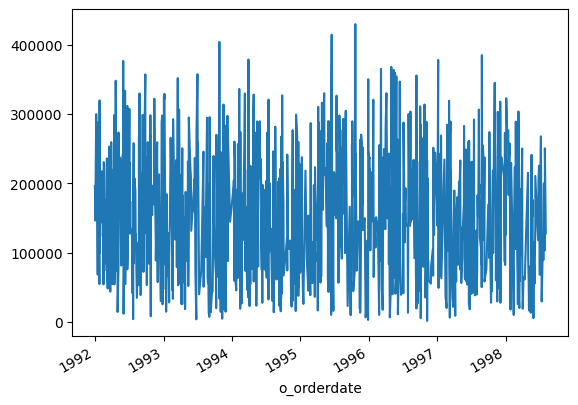

In [15]:
df.sort_index()['o_totalprice'].plot()

In [16]:
# you can also use the following to read data from Snowflake using SQLAlchemy and Pandas
query = "SELECT * FROM ORDERS LIMIT 1000;"
con = engine.connect()
df = pd.read_sql(query,
                 con,
                 index_col='o_orderdate',
                 parse_dates=['o_orderdate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 1992-12-17 to 1993-01-19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   o_orderkey       1000 non-null   int64  
 1   o_custkey        1000 non-null   int64  
 2   o_orderstatus    1000 non-null   object 
 3   o_totalprice     1000 non-null   float64
 4   o_orderpriority  1000 non-null   object 
 5   o_clerk          1000 non-null   object 
 6   o_shippriority   1000 non-null   int64  
 7   o_comment        1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 70.3+ KB


In [ ]:
# but here you will need to close the connection manually
con.close()
engine.dispose()  # this will close all connections associated with the engine

## Using Snowpark

In [1]:
# ! uv pip install snowflake-snowpark-python 

In [ ]:
from snowflake.snowpark import Session
from configparser import ConfigParser
import pandas as pd

config = ConfigParser()
config.read('snow.cfg')
params = dict(config['READ'])

In [3]:
session = Session.builder.configs(params).create()

In [5]:
session

In [6]:
print(session.sql("SELECT CURRENT_VERSION()"))

In [8]:
query = "SELECT * FROM ORDERS LIMIT 100;"
# notice that this does not return a DataFrame, it returns a Snowpark DataFrame
# also there is no data fetched yet, it is lazy like the cursor in the Snowflake connector
# it will not execute the query until you call collect() or show() on the DataFrame
session.sql(query)

#### different ways to fetch the data


In [ ]:
# using collect() to fetch the data
df = session.sql(query).collect()
# this returns a list of Row objects, not a pandas DataFrame
# to convert it to a pandas DataFrame, you can use the following
type(df)

list

In [15]:
# convert to pandas DataFrame
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   O_ORDERKEY       100 non-null    int64 
 1   O_CUSTKEY        100 non-null    int64 
 2   O_ORDERSTATUS    100 non-null    object
 3   O_TOTALPRICE     100 non-null    object
 4   O_ORDERDATE      100 non-null    object
 5   O_ORDERPRIORITY  100 non-null    object
 6   O_CLERK          100 non-null    object
 7   O_SHIPPRIORITY   100 non-null    int64 
 8   O_COMMENT        100 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.2+ KB


In [18]:
# another way to fetch data is to use the to_pandas() method
df = session.sql(query).to_pandas()
df.head()

,O_ORDERKEY,O_CUSTKEY,O_ORDERSTATUS,O_TOTALPRICE,O_ORDERDATE,O_ORDERPRIORITY,O_CLERK,O_SHIPPRIORITY,O_COMMENT
0,3000001,145618,F,30175.88,1992-12-17,4-NOT SPECIFIED,Clerk#000000141,0,l packages. furiously careful instructions gro...
1,3000002,1481,O,297999.63,1995-07-28,1-URGENT,Clerk#000000547,0,carefully unusual dependencie
2,3000003,127432,O,345438.38,1997-11-04,5-LOW,Clerk#000000488,0,n packages boost slyly bold deposits. deposits...
3,3000004,47423,O,135965.53,1996-06-13,4-NOT SPECIFIED,Clerk#000000004,0,nts wake carefully final decoys. quickly final...
4,3000005,84973,F,209937.09,1992-09-12,5-LOW,Clerk#000000030,0,yly after the quickly unusual ide


In [20]:
# you can also use read.table()
orders = session.read.table("ORDERS")
orders.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"O_ORDERKEY"  |"O_CUSTKEY"  |"O_ORDERSTATUS"  |"O_TOTALPRICE"  |"O_ORDERDATE"  |"O_ORDERPRIORITY"  |"O_CLERK"        |"O_SHIPPRIORITY"  |"O_COMMENT"                                         |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|3000001       |145618       |F                |30175.88        |1992-12-17     |4-NOT SPECIFIED    |Clerk#000000141  |0                 |l packages. furiously careful instructions grow...  |
|3000002       |1481         |O                |297999.63       |1995-07-28     |1-URGENT           |Clerk#000000547  |0                 |carefully unusual dependencie                       |
|3000003       |127432       |O         

In [22]:
# you can also use read.table() with to_pandas()
# you can limit the number of rows returned by using the limit() method
orders = session.read.table("ORDERS").limit(100).to_pandas()
orders.head()

,O_ORDERKEY,O_CUSTKEY,O_ORDERSTATUS,O_TOTALPRICE,O_ORDERDATE,O_ORDERPRIORITY,O_CLERK,O_SHIPPRIORITY,O_COMMENT
0,3000001,145618,F,30175.88,1992-12-17,4-NOT SPECIFIED,Clerk#000000141,0,l packages. furiously careful instructions gro...
1,3000002,1481,O,297999.63,1995-07-28,1-URGENT,Clerk#000000547,0,carefully unusual dependencie
2,3000003,127432,O,345438.38,1997-11-04,5-LOW,Clerk#000000488,0,n packages boost slyly bold deposits. deposits...
3,3000004,47423,O,135965.53,1996-06-13,4-NOT SPECIFIED,Clerk#000000004,0,nts wake carefully final decoys. quickly final...
4,3000005,84973,F,209937.09,1992-09-12,5-LOW,Clerk#000000030,0,yly after the quickly unusual ide


In [23]:
# you can also use read.table() without to_pandas()
# this will return a Snowpark DataFrame 
# you can also limit the number of rows returned by using the limit() method
orders = session.table("ORDERS").limit(100).to_pandas()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   O_ORDERKEY       100 non-null    int32  
 1   O_CUSTKEY        100 non-null    int32  
 2   O_ORDERSTATUS    100 non-null    object 
 3   O_TOTALPRICE     100 non-null    float64
 4   O_ORDERDATE      100 non-null    object 
 5   O_ORDERPRIORITY  100 non-null    object 
 6   O_CLERK          100 non-null    object 
 7   O_SHIPPRIORITY   100 non-null    int8   
 8   O_COMMENT        100 non-null    object 
dtypes: float64(1), int32(2), int8(1), object(5)
memory usage: 5.7+ KB


# Lab 2: Writing to Snowflake
## Using Snowflake Connector (write_panads)

In [25]:
# !uv pip install yfinance

In [45]:
import yfinance as yf
import pandas as pd

def get_stock_data(ticker, start, end=None):
    """Fetch stock data and return cleaned DataFrame"""
    stock_data = yf.Ticker(ticker)
    hist = stock_data.history(start=start, end=end)

    # Standardize date format and select key columns
    hist.index = hist.index.tz_localize(None).normalize()
    return hist[['Open', 'High', 'Low', 'Close', 'Volume']]

# Example usage
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
apple_stock_data = get_stock_data(ticker, start_date, end_date)
apple_stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,71.627100,72.681296,71.373226,72.620850,135480400
2020-01-03,71.847133,72.676462,71.689973,71.914833,146322800
2020-01-06,71.034717,72.526541,70.783256,72.487854,118387200
2020-01-07,72.497529,72.753823,71.926915,72.146942,108872000
2020-01-08,71.849540,73.609752,71.849540,73.307518,132079200


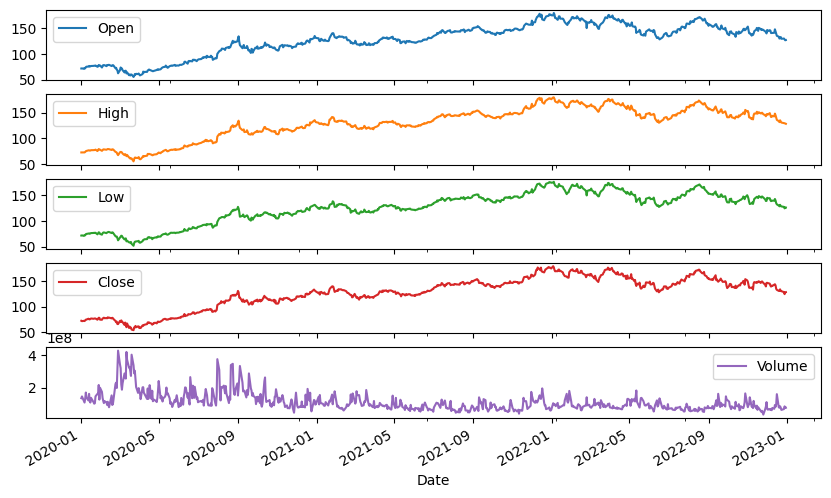

In [48]:
apple_stock_data.plot(subplots=True, figsize=(10, 6));

In [31]:
import pandas as pd
from snowflake.connector.pandas_tools import pd_writer
from configparser import ConfigParser
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine


config = ConfigParser()
config.read('snow.cfg')
config.sections()
params = dict(config['WRITE'])

In [29]:
apple_stock_data = apple_stock_data.reset_index()
apple_stock_data.shape

(756, 7)

In [32]:
from snowflake import connector
from snowflake.connector.pandas_tools import pd_writer, write_pandas

In [33]:
con = connector.connect(**params)
cursor = con.cursor()

# write_pandas you can specify the table type and whether to overwrite the table
# the write_pandas method will return a tuple with success status, number of chunks, number of rows, and copy_into command
success, nchunks, nrows, copy_into = write_pandas(
                                            con, 
                                            apple_stock_data, 
                                            auto_create_table=True,
                                            table_name='AAPL_STOCK_DATA', 
                                            table_type='temporary',
                                            overwrite=True)

In [34]:
print('success: ', success)
print('number of chunks: ', nchunks)
print('number of rows: ', nrows)
print('COPY INTO output', copy_into)

success:  True
number of chunks:  1
number of rows:  756
COPY INTO output [('snowpark_temp_stage_t49pthleiu/file0.txt', 'LOADED', 756, 756, 1, 0, None, None, None, None)]


In [38]:
# let's check if the data is written to Snowflake
query = "SELECT count(*) FROM AAPL_STOCK_DATA;"
count = cursor.execute(query).fetchone()[0]
count

756

In [39]:
cursor.describe('SELECT * FROM AAPL_STOCK_DATA LIMIT 10;')

[ResultMetadata(name='index', type_code=0, display_size=None, internal_size=None, precision=38, scale=0, is_nullable=True),
 ResultMetadata(name='Date', type_code=0, display_size=None, internal_size=None, precision=38, scale=0, is_nullable=True),
 ResultMetadata(name='Open', type_code=1, display_size=None, internal_size=None, precision=None, scale=None, is_nullable=True),
 ResultMetadata(name='High', type_code=1, display_size=None, internal_size=None, precision=None, scale=None, is_nullable=True),
 ResultMetadata(name='Low', type_code=1, display_size=None, internal_size=None, precision=None, scale=None, is_nullable=True),
 ResultMetadata(name='Close', type_code=1, display_size=None, internal_size=None, precision=None, scale=None, is_nullable=True),
 ResultMetadata(name='Volume', type_code=0, display_size=None, internal_size=None, precision=38, scale=0, is_nullable=True)]

## Using SQL Alchemy

In [ ]:
import pandas as pd
from snowflake.connector.pandas_tools import pd_writer
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine

config = ConfigParser()
config.read('snow.cfg')
config.sections()
params = dict(config['WRITE'])


In [55]:
url = URL(**params)
engine = create_engine(url)

In [56]:
# let's pull amazon stock data using our get_stock_data function
# Example usage
ticker = 'AMZN'
start_date = '2020-01-01'
end_date = '2023-01-01'
amazon_stock_data = get_stock_data(ticker, start_date, end_date)
amazon_stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,70160000


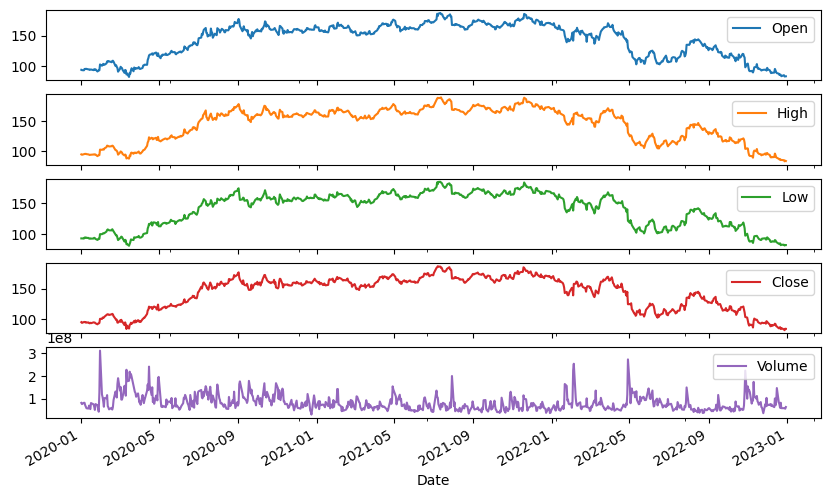

In [57]:
amazon_stock_data.plot(subplots=True, figsize=(10, 6));

In [58]:
amazon_stock_data = amazon_stock_data.reset_index()
amazon_stock_data.shape

(756, 6)

In [65]:
amazon_stock_data.to_sql('amzn_stock_data_alchemy',
                         con=engine,
                         if_exists='replace',
                         index=False)

756

In [66]:
pd.read_sql_table('amzn_stock_data_alchemy', 
                  engine).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    756 non-null    datetime64[ns]
 1   Open    756 non-null    float64       
 2   High    756 non-null    float64       
 3   Low     756 non-null    float64       
 4   Close   756 non-null    float64       
 5   Volume  756 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 35.6 KB


## Using Snowpark

In [68]:
from snowflake.snowpark import Session
import pandas as pd

config = ConfigParser()
config.read('snow.cfg')
config.sections()
params = dict(config['WRITE'])

In [69]:
session = Session.builder.configs(params).create()

In [71]:
# let's use our get_stock_data function to fetch Nvidia stock data
ticker = 'NVDA'
start_date = '2020-01-01'
end_date = '2023-01-01'
nvidia_stock_data = get_stock_data(ticker, start_date, end_date)
nvidia_stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,5.942873,5.971747,5.892344,5.971747,237536000
2020-01-03,5.852018,5.919972,5.827126,5.876163,205384000
2020-01-06,5.782819,5.906033,5.756683,5.900805,262636000
2020-01-07,5.929182,6.018045,5.884128,5.972244,314856000
2020-01-08,5.968012,6.024765,5.927937,5.983445,277108000


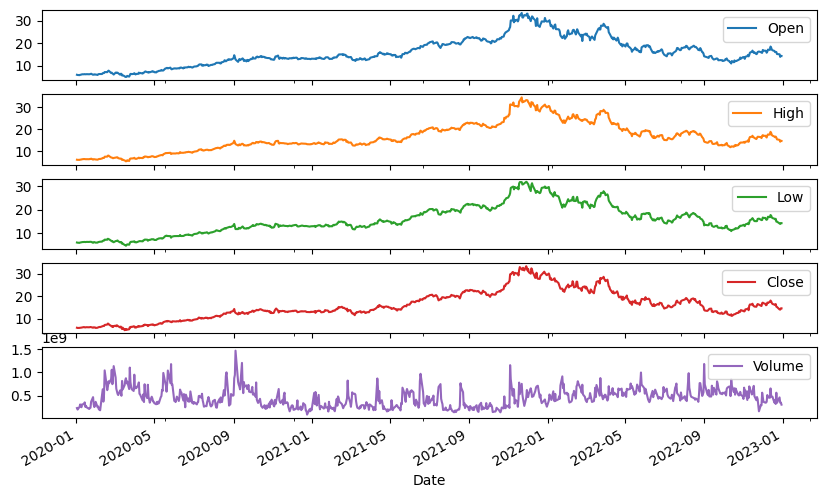

In [72]:
nvidia_stock_data.plot(subplots=True, figsize=(10, 6));

In [75]:
nvidia_stock_data = nvidia_stock_data.reset_index()
nvidia_snowpark_df = session.create_dataframe(nvidia_stock_data)
# we are converting the pandas DataFrame to a Snowpark DataFrame
nvidia_snowpark_df

In [78]:
# create a new temporary table in Snowflake
# updated to make it temporary table type
nvidia_snowpark_df.write.mode('overwrite').save_as_table('NVDA_STOCK_DATA', table_type='temporary')

In [79]:
# let's read the data back from Snowflake
nvidia_read_snowpark_df = session.table('NVDA_STOCK_DATA')
nvidia_pandas = nvidia_read_snowpark_df.to_pandas()
nvidia_pandas.head()

,index,Date,Open,High,Low,Close,Volume
0,0,2020-01-02,5.942873,5.971747,5.892344,5.971747,237536000
1,1,2020-01-03,5.852018,5.919972,5.827126,5.876163,205384000
2,2,2020-01-06,5.782819,5.906033,5.756683,5.900805,262636000
3,3,2020-01-07,5.929182,6.018045,5.884128,5.972244,314856000
4,4,2020-01-08,5.968012,6.024765,5.927937,5.983445,277108000


In [ ]:
# Snowparl also offers us a write_pandas method similar to the Snowflake connector
# this way we can write the pandas DataFrame directly to Snowflake
# we can specify the table type and whether to overwrite the table
snowpark_df = session.write_pandas(nvidia_stock_data,
                                    table_name='NVDA_STOCK_DATA_SP',
                                    auto_create_table=True,
                                    table_type='temporary',
                                    overwrite=True)

In [83]:
# the returned object is a Snowpark DataFrame
snowpark_df